Cargando laberinto desde Laberinto1.txt...
Punto de inicio: (126, 126), Punto de salida: (1, 1)

Ejecutando algoritmos con el punto de inicio original...

Algoritmo          Longitud   Nodos      Tiempo (s)   Branching  ¿Solución?
--------------------------------------------------------------------------------
BFS                251        15876      0.044650       1.0393       Sí
DFS                8001       8001       0.020902       1.0011       Sí
Greedy-Manhattan   251        6119       0.118445       1.0353       Sí
Greedy-Euclidiana  251        15641      0.120743       1.0392       Sí
A*-Manhattan       251        3804       0.016407       1.0334       Sí
A*-Euclidiana      251        15641      0.203481       1.0392       Sí


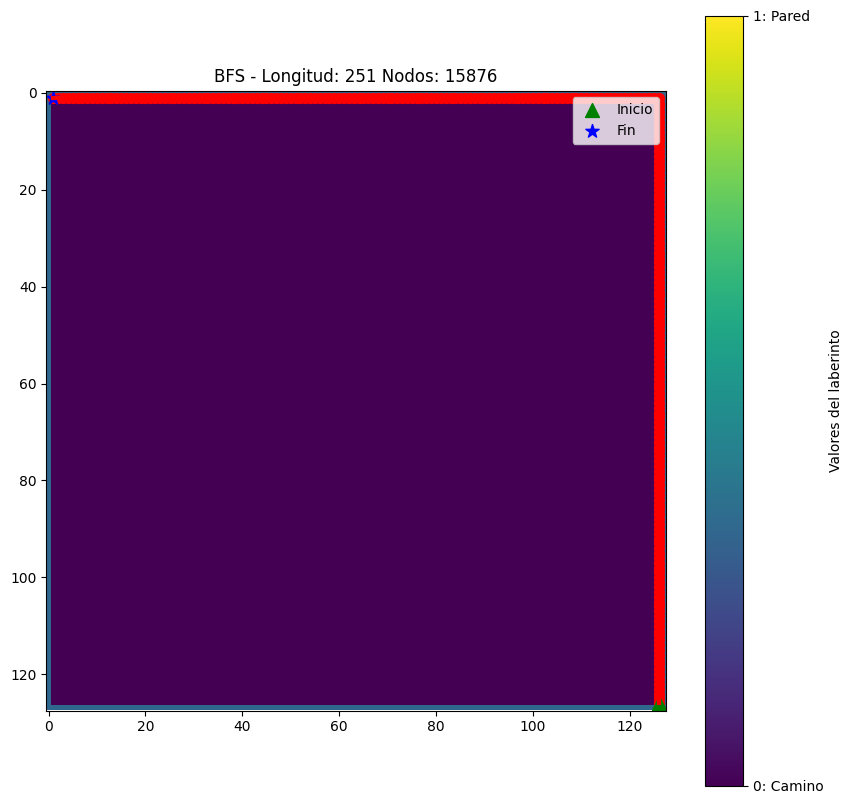

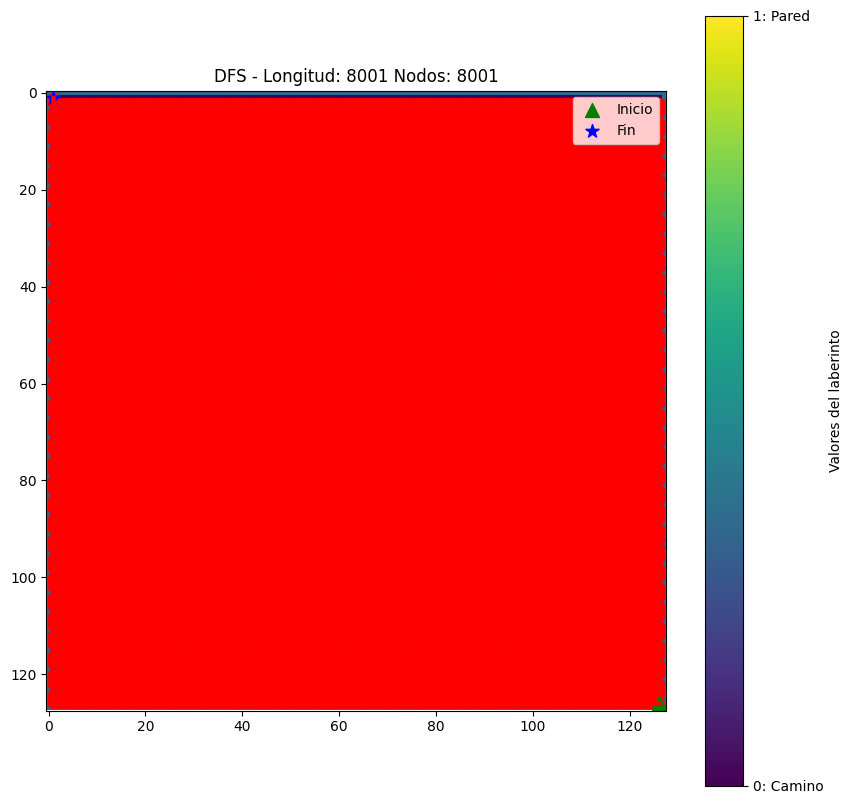

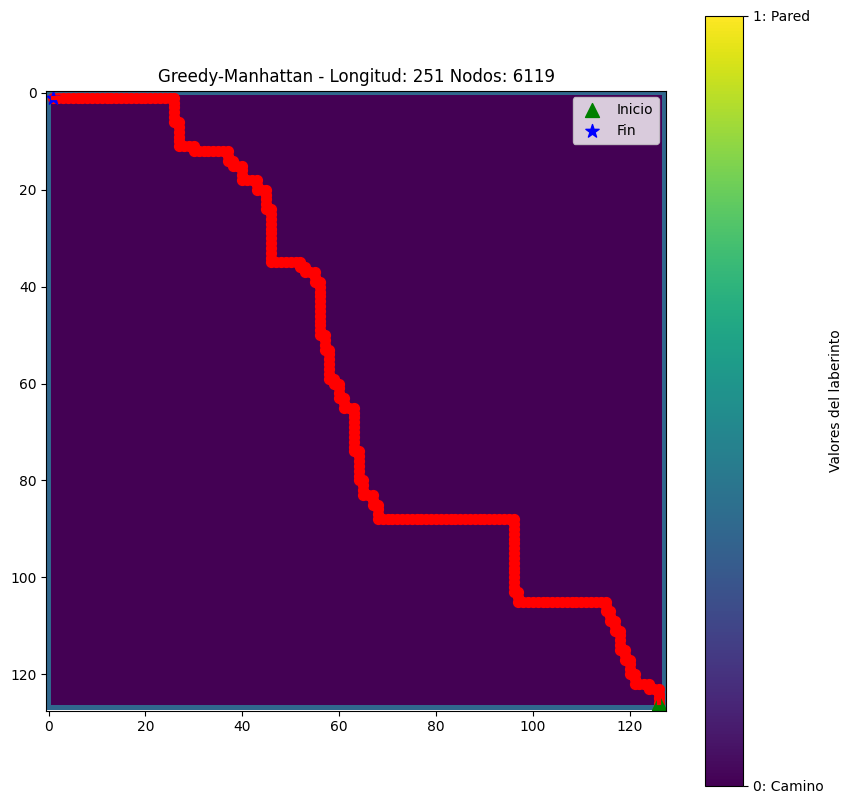

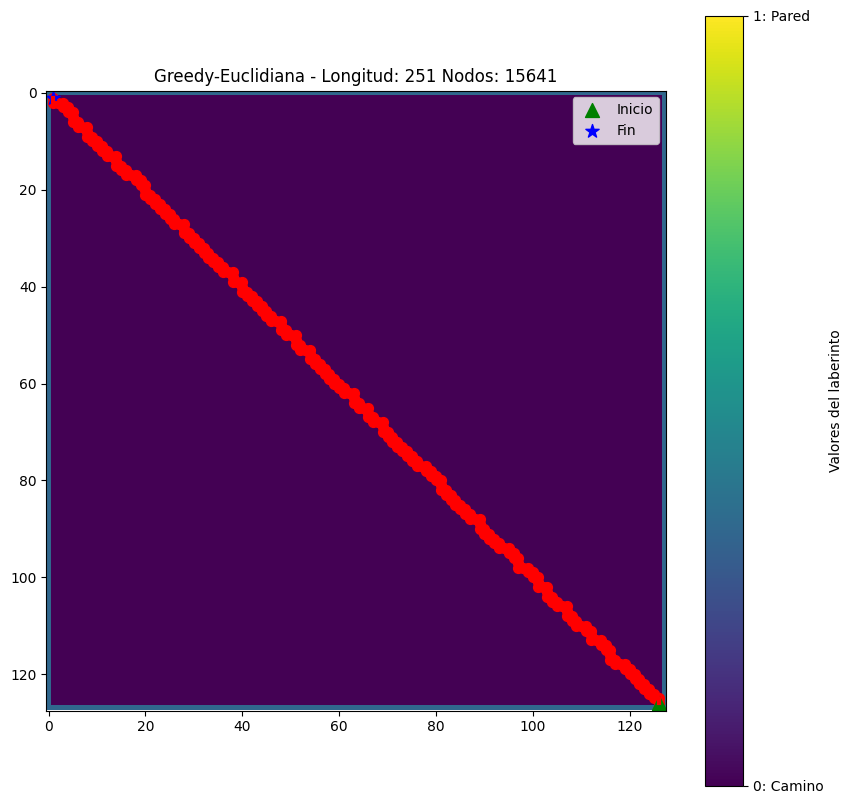

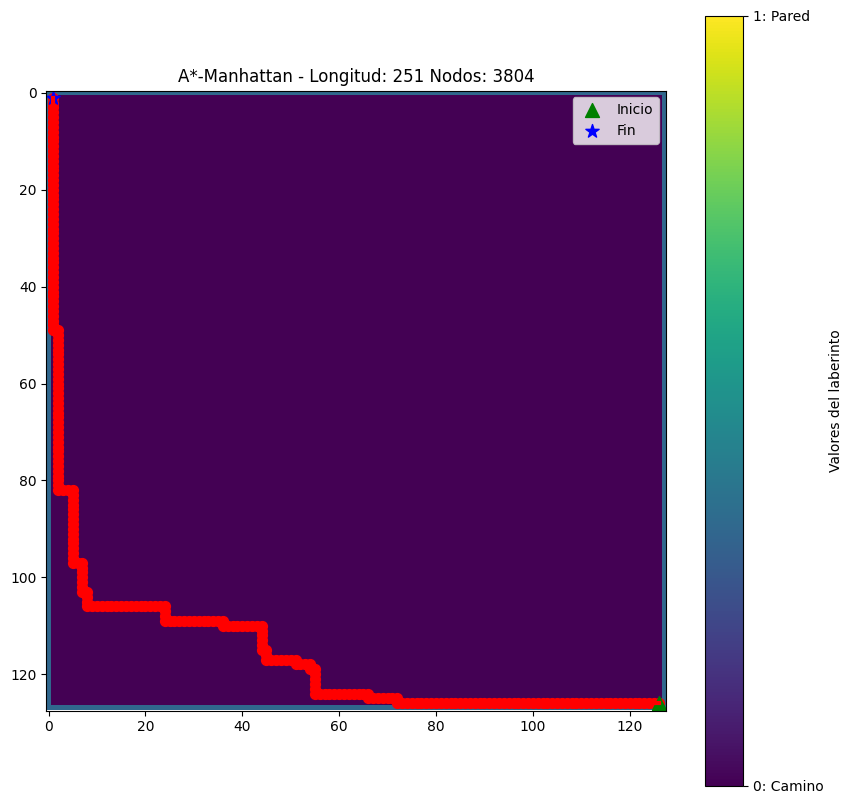

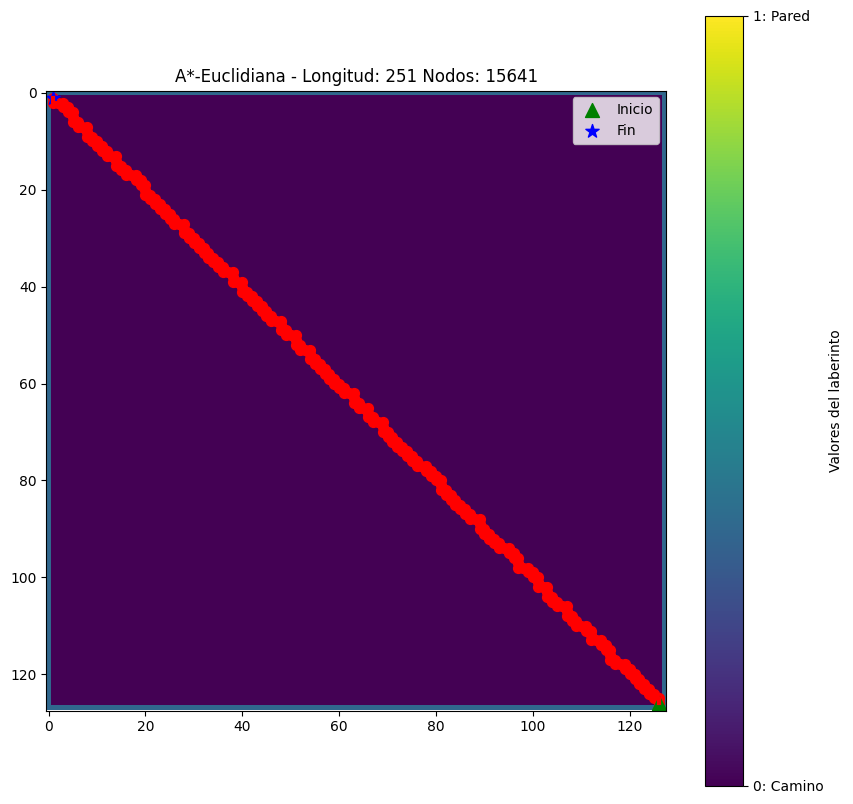


Comparando algoritmos con 3 puntos de partida aleatorios...

Punto aleatorio 1: (76, 95)

Algoritmo          Longitud   Nodos      Tiempo (s)   Branching  ¿Solución?
--------------------------------------------------------------------------------
BFS                170        15876      0.034071       1.0585       Sí
DFS                8028       8031       0.028600       1.0011       Sí
Greedy-Manhattan   170        1275       0.005862       1.0430       Sí
Greedy-Euclidiana  170        10146      0.161868       1.0558       Sí
A*-Manhattan       170        4517       0.030005       1.0507       Sí
A*-Euclidiana      170        10146      0.078694       1.0558       Sí


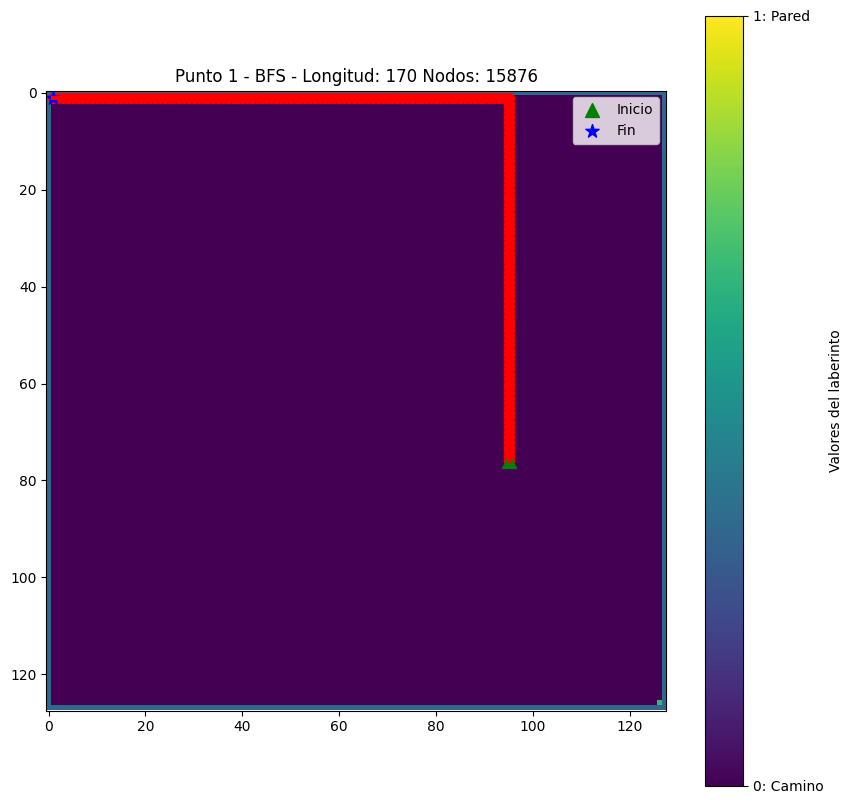

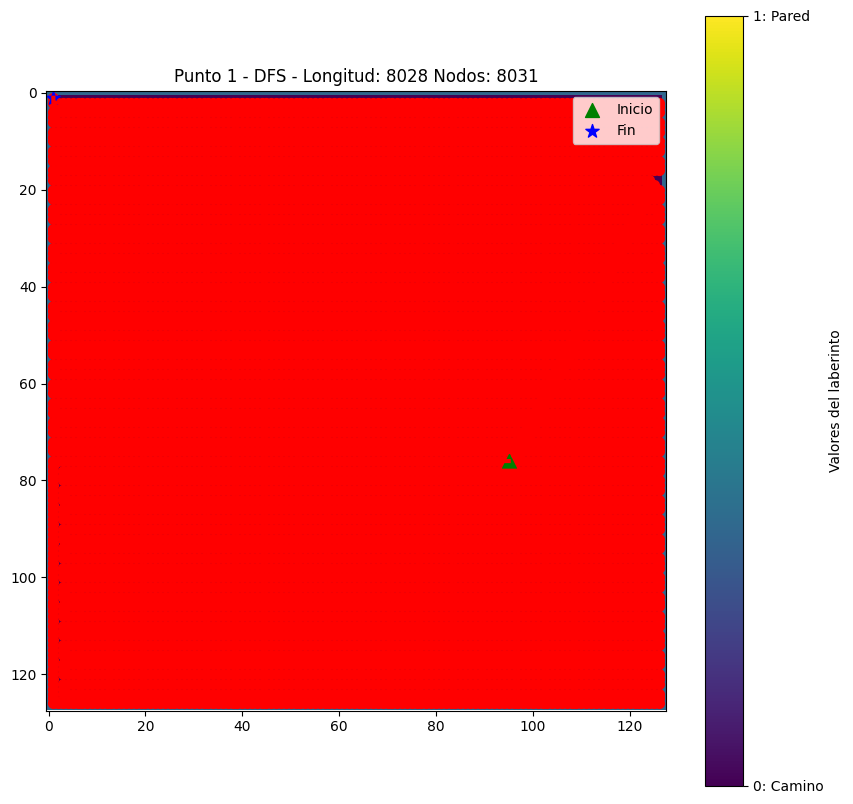

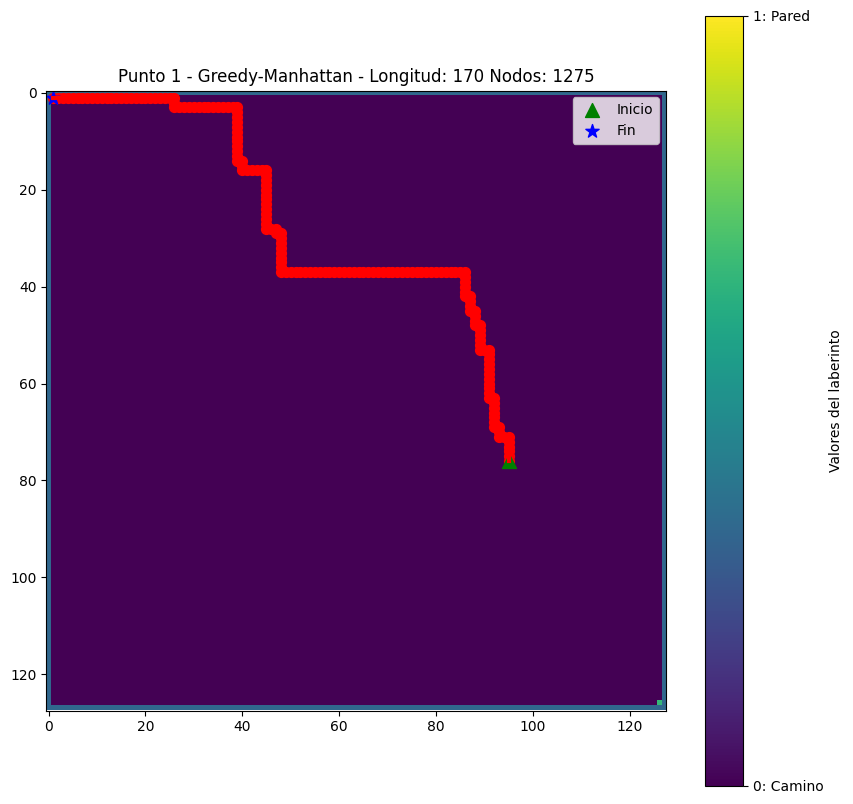

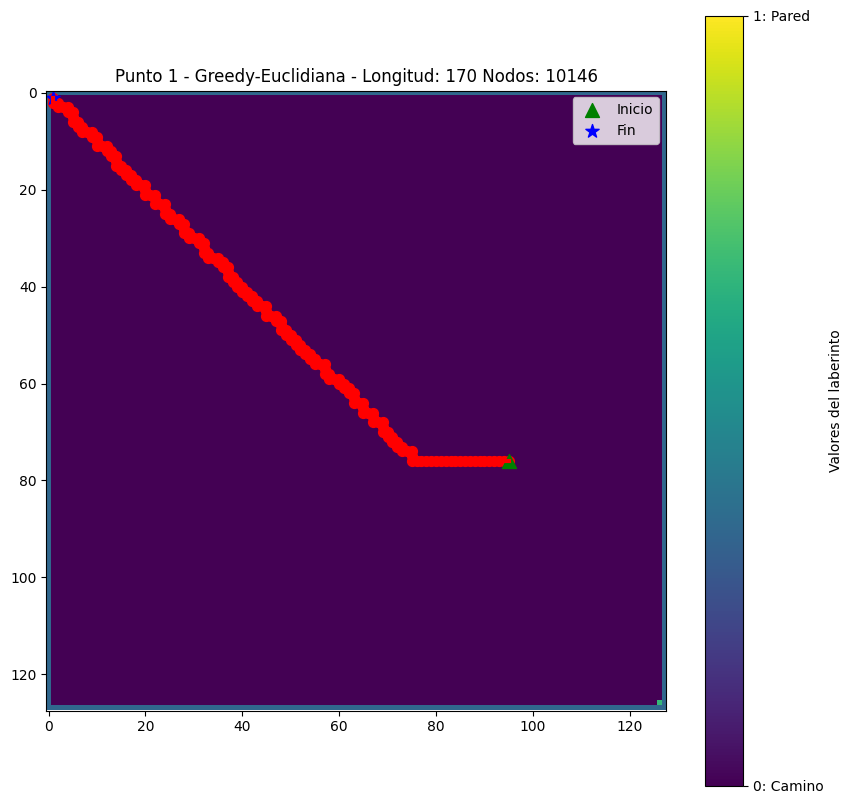

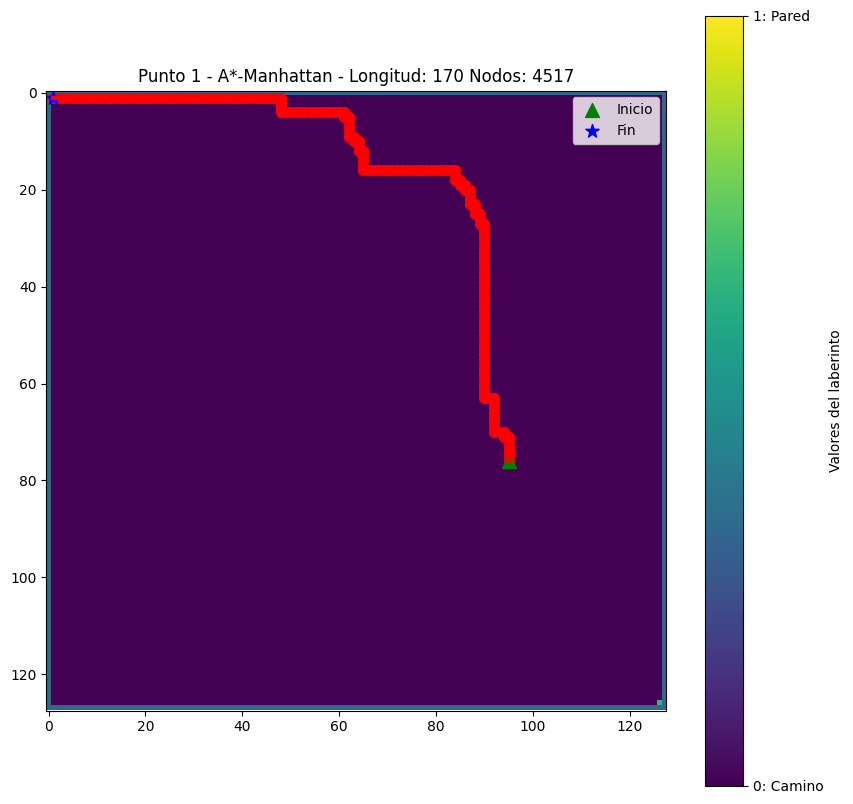

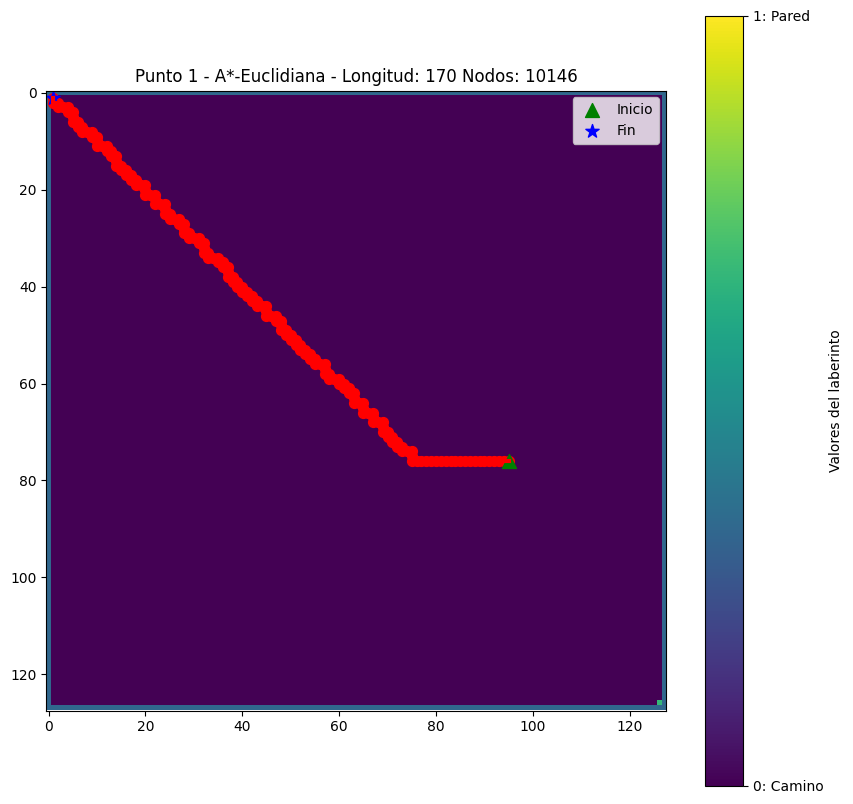


Punto aleatorio 2: (100, 18)

Algoritmo          Longitud   Nodos      Tiempo (s)   Branching  ¿Solución?
--------------------------------------------------------------------------------
BFS                117        11409      0.034541       1.0831       Sí
DFS                7991       7991       0.110754       1.0011       Sí
Greedy-Manhattan   117        725        0.002905       1.0579       Sí
Greedy-Euclidiana  117        2649       0.018240       1.0697       Sí
A*-Manhattan       117        491        0.001831       1.0544       Sí
A*-Euclidiana      117        2649       0.018844       1.0697       Sí


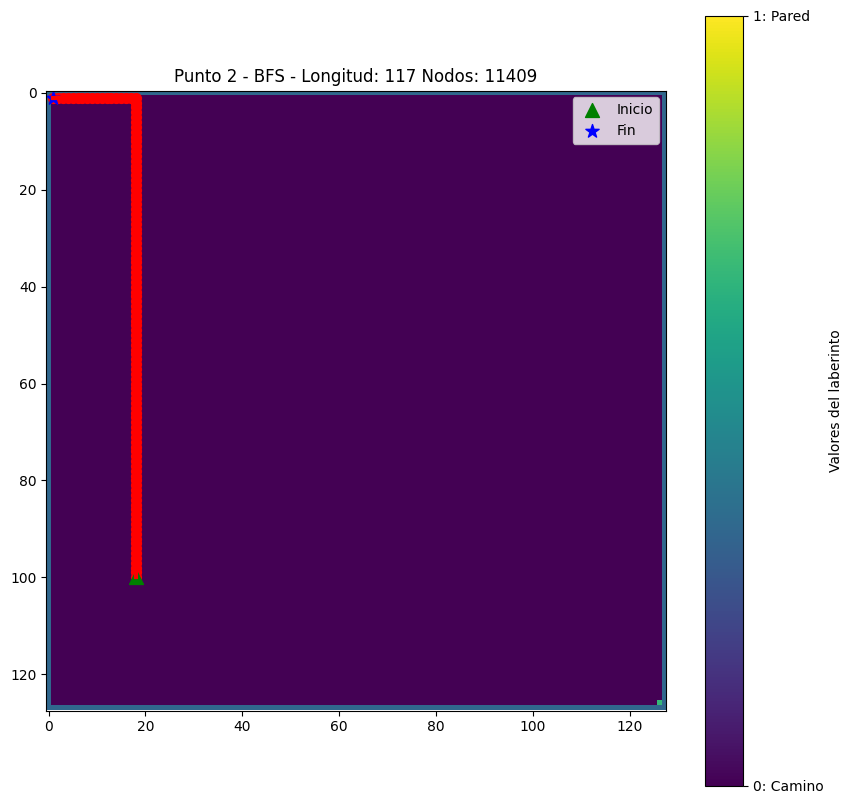

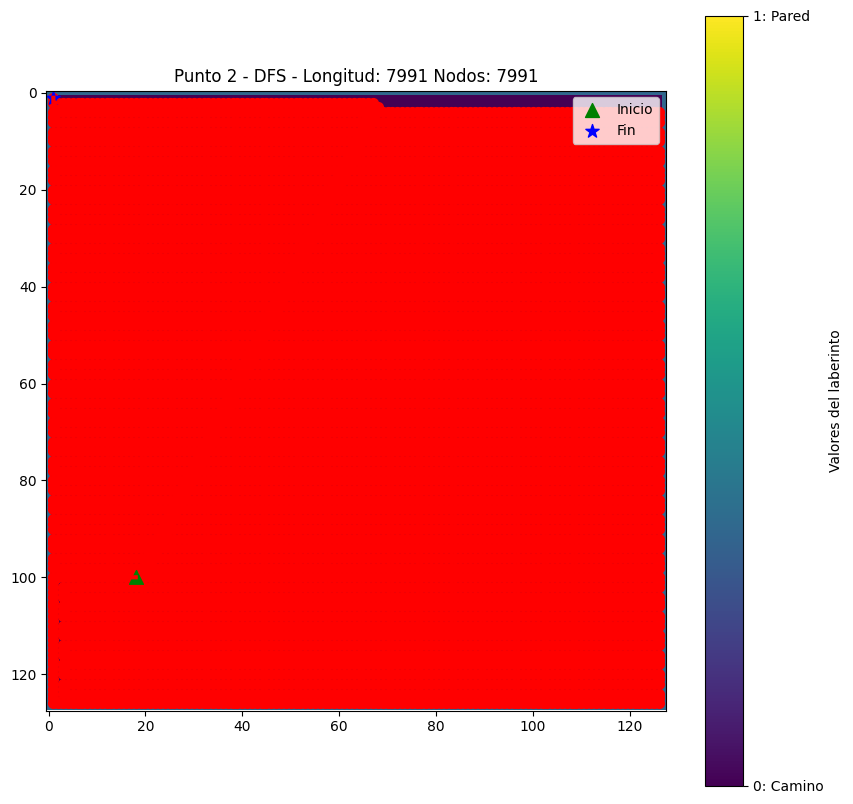

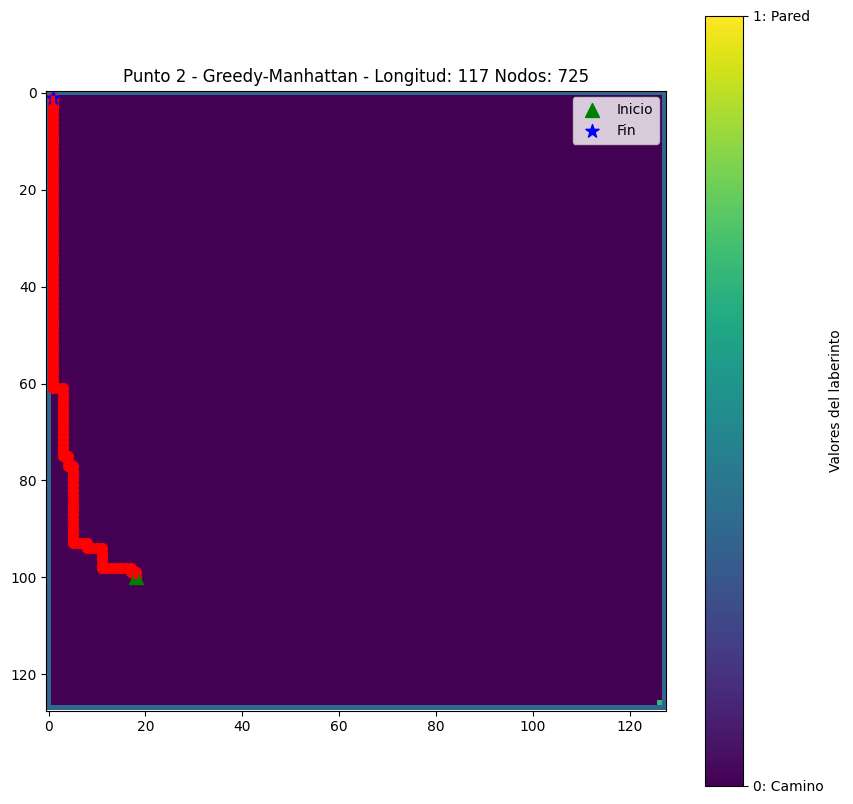

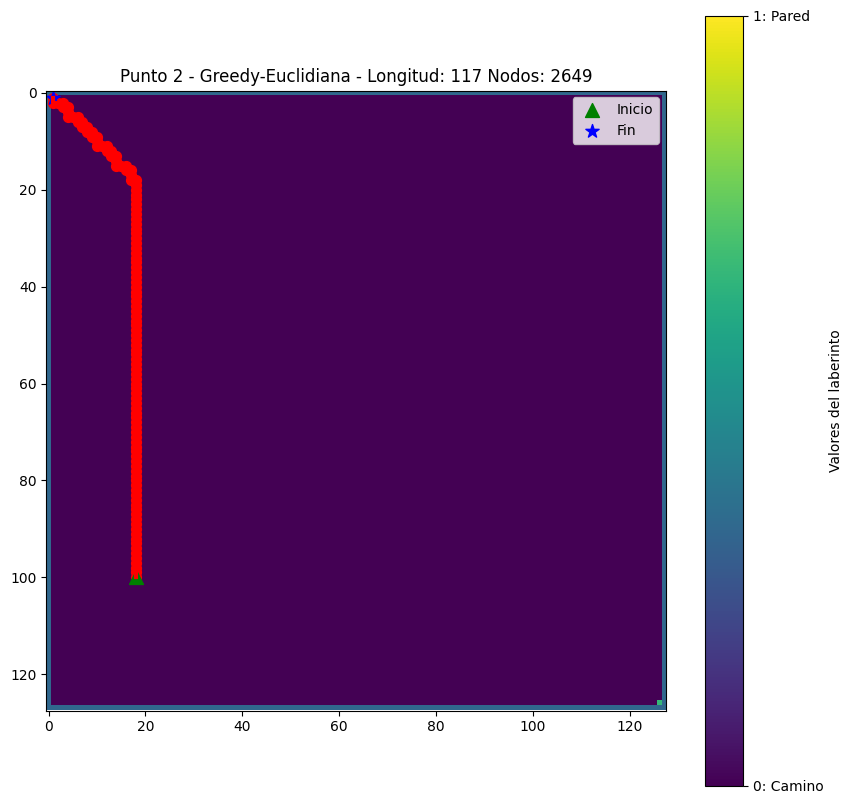

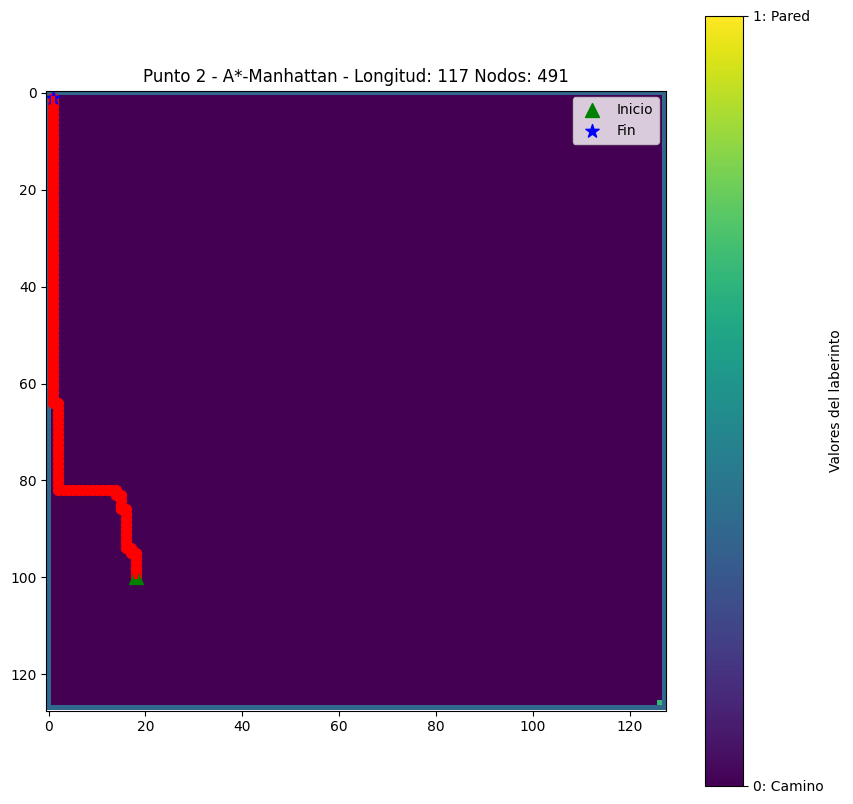

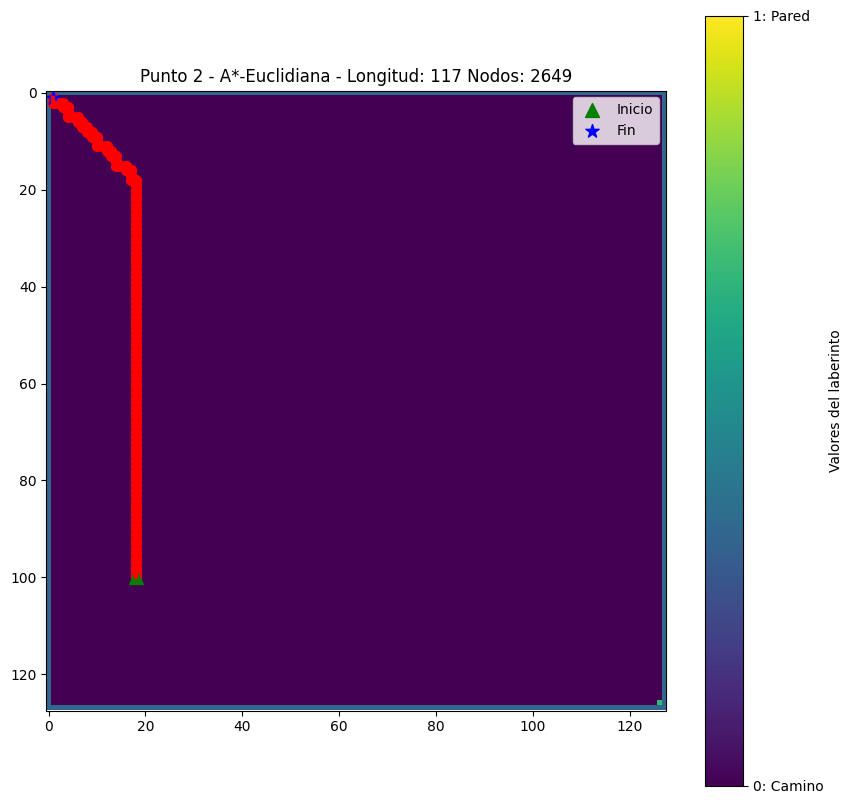


Punto aleatorio 3: (3, 110)

Algoritmo          Longitud   Nodos      Tiempo (s)   Branching  ¿Solución?
--------------------------------------------------------------------------------
BFS                112        8107       0.017087       1.0837       Sí
DFS                7988       7989       0.126681       1.0011       Sí
Greedy-Manhattan   112        329        0.001117       1.0531       Sí
Greedy-Euclidiana  112        358        0.002850       1.0539       Sí
A*-Manhattan       112        329        0.001070       1.0531       Sí
A*-Euclidiana      112        358        0.004856       1.0539       Sí


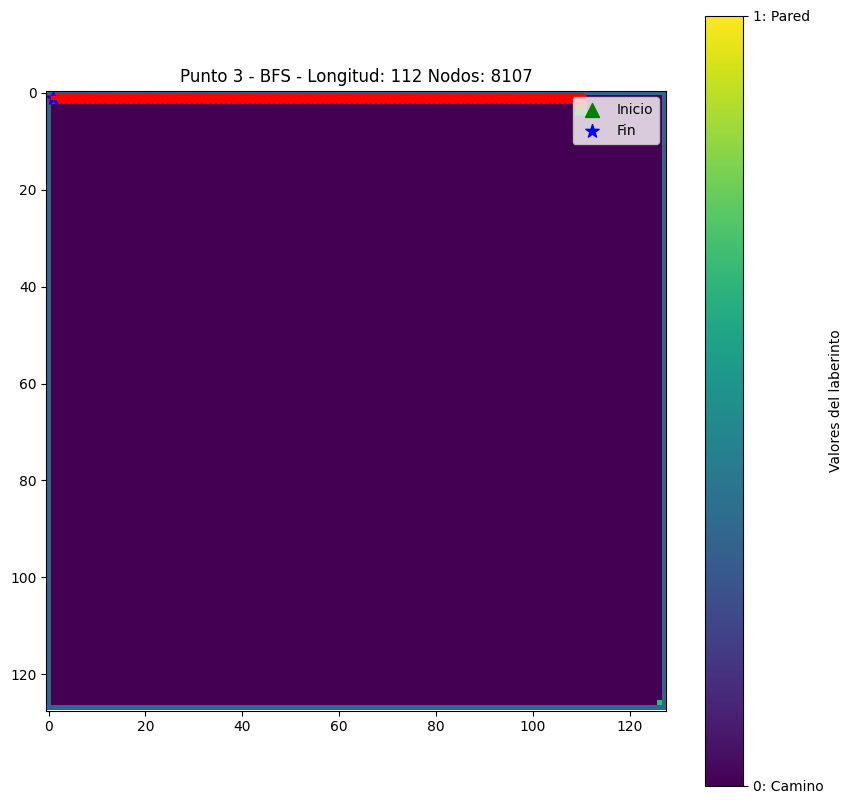

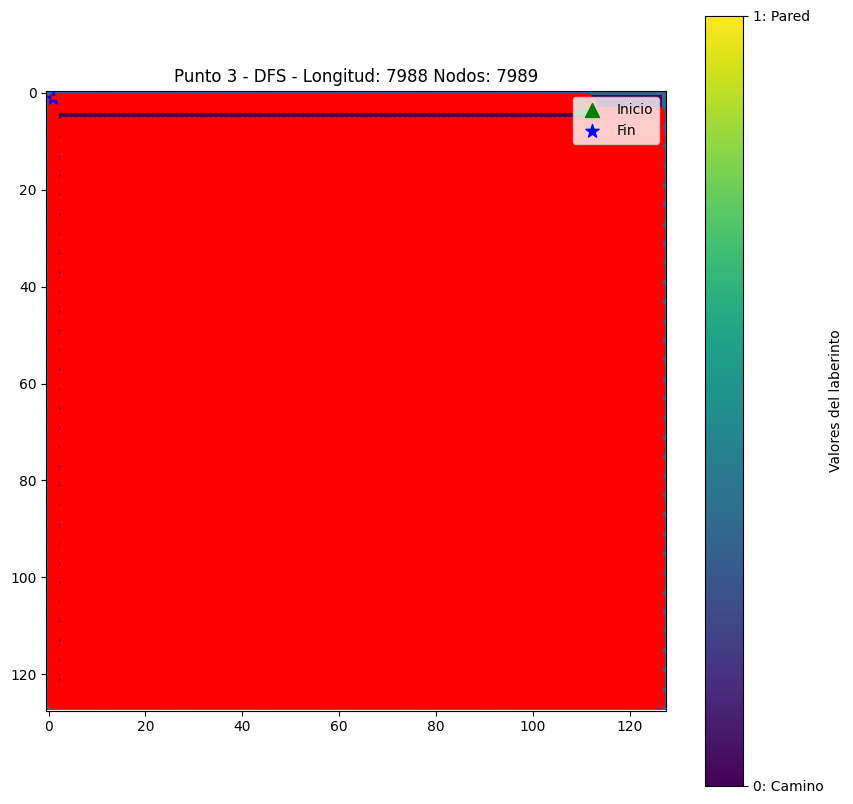

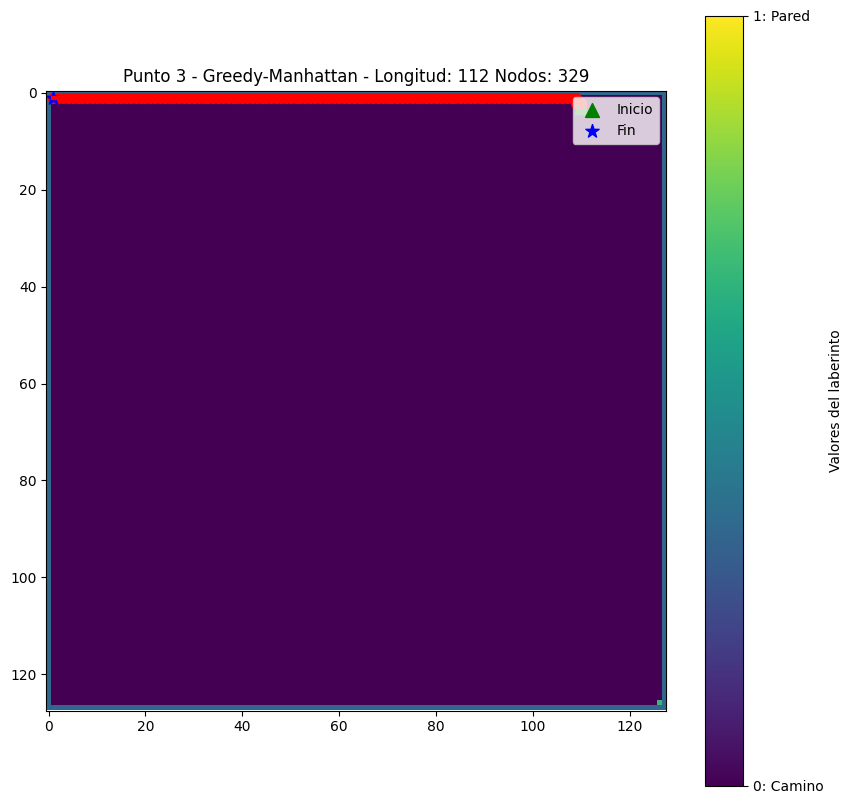

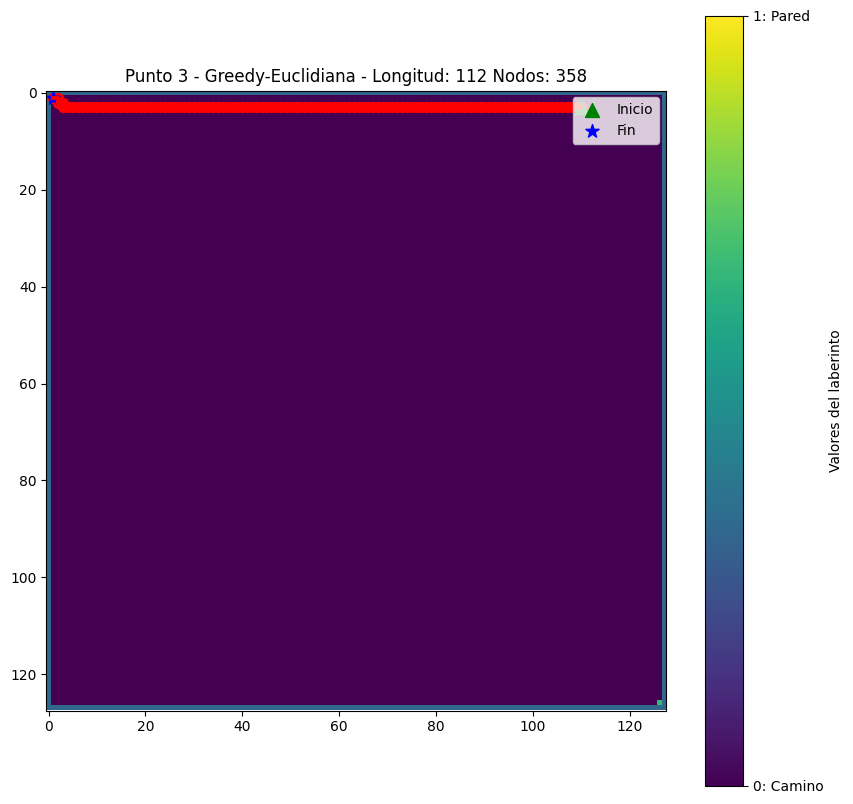

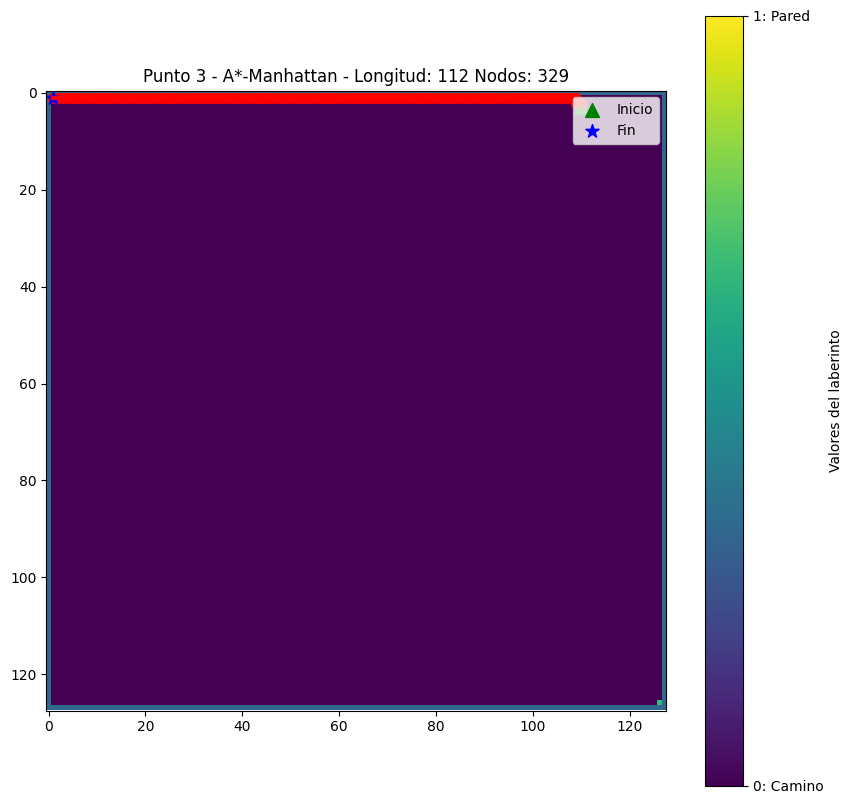

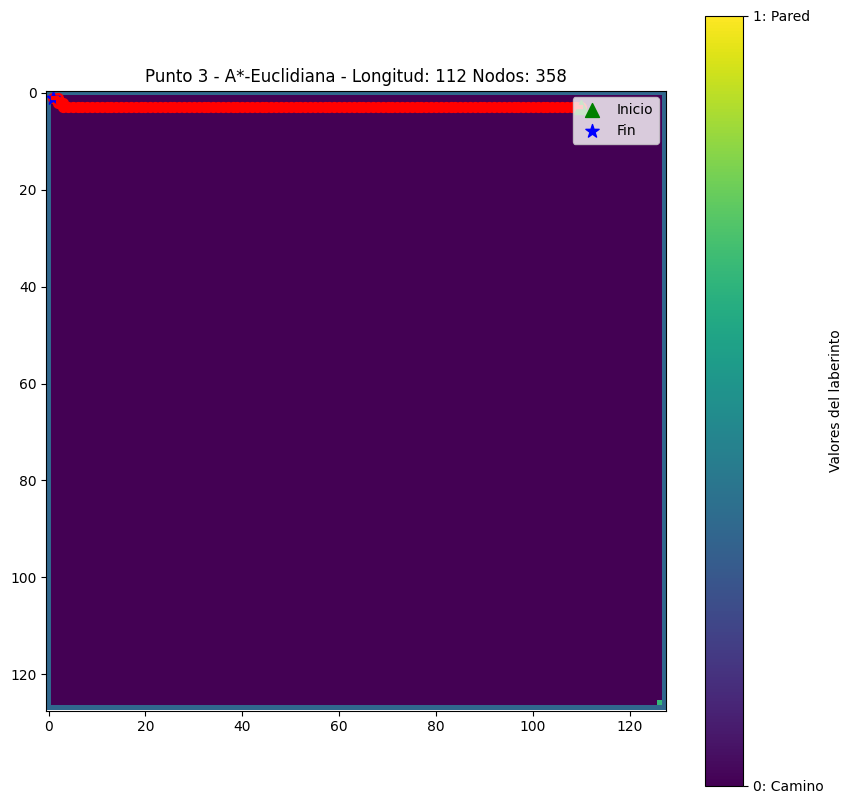

In [16]:
import heapq
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import time
import random

# Cargar el laberinto desde el archivo
def cargar_laberinto(archivo):
    laberinto = []
    with open(archivo, "r") as file:
        for line in file:
            line = line.strip()
            if line:  # Solo procesar líneas no vacías
                try:
                    # Separar por comas y filtrar elementos vacíos
                    valores = [x for x in line.split(",") if x]
                    if valores:  # Asegurarse de que hay valores para procesar
                        laberinto.append([int(x) for x in valores])
                except ValueError as e:
                    print(f"Error al procesar línea: '{line}'")
                    print(f"Intente verificar el formato del archivo {archivo}")
                    raise
    return laberinto

# Encontrar el punto de inicio (2) y el punto de salida (3)
def encontrar_puntos(laberinto):
    inicio, salida = None, None
    for i in range(len(laberinto)):
        for j in range(len(laberinto[i])):
            if laberinto[i][j] == 2:
                inicio = (i, j)
            elif laberinto[i][j] == 3:
                salida = (i, j)
    return inicio, salida

# Movimientos posibles (arriba, derecha, abajo, izquierda)
movimientos = [(-1, 0), (0, 1), (1, 0), (0, -1)]

# Clase Nodo para representar un estado en el laberinto
class Nodo:
    def __init__(self, estado, padre=None, costo_camino=0, heuristica=0):
        self.estado = estado
        self.padre = padre
        self.costo_camino = costo_camino
        self.heuristica = heuristica

    def __lt__(self, otro):
        return (self.costo_camino + self.heuristica) < (otro.costo_camino + otro.heuristica)

# Funciones heurísticas
def heuristica_manhattan(estado, objetivo):
    return abs(estado[0] - objetivo[0]) + abs(estado[1] - objetivo[1])

def heuristica_euclidiana(estado, objetivo):
    return np.sqrt((estado[0] - objetivo[0])**2 + (estado[1] - objetivo[1])**2)

# Algoritmos de búsqueda
def breadth_first_search(inicio, objetivo, laberinto):
    nodos_explorados = 0
    frontera = deque()
    frontera.append(Nodo(inicio))
    visitados = set([inicio])

    while frontera:
        nodo = frontera.popleft()
        nodos_explorados += 1

        if nodo.estado == objetivo:
            return nodo, nodos_explorados

        for movimiento in movimientos:
            nuevo_estado = (nodo.estado[0] + movimiento[0], nodo.estado[1] + movimiento[1])
            if (0 <= nuevo_estado[0] < len(laberinto) and
                0 <= nuevo_estado[1] < len(laberinto[0]) and
                laberinto[nuevo_estado[0]][nuevo_estado[1]] != 1 and
                nuevo_estado not in visitados):
                visitados.add(nuevo_estado)
                frontera.append(Nodo(nuevo_estado, nodo, nodo.costo_camino + 1))

    return None, nodos_explorados

def depth_first_search(inicio, objetivo, laberinto):
    nodos_explorados = 0
    frontera = []
    frontera.append(Nodo(inicio))
    visitados = set([inicio])

    while frontera:
        nodo = frontera.pop()
        nodos_explorados += 1

        if nodo.estado == objetivo:
            return nodo, nodos_explorados

        for movimiento in movimientos:
            nuevo_estado = (nodo.estado[0] + movimiento[0], nodo.estado[1] + movimiento[1])
            if (0 <= nuevo_estado[0] < len(laberinto) and
                0 <= nuevo_estado[1] < len(laberinto[0]) and
                laberinto[nuevo_estado[0]][nuevo_estado[1]] != 1 and
                nuevo_estado not in visitados):
                visitados.add(nuevo_estado)
                frontera.append(Nodo(nuevo_estado, nodo, nodo.costo_camino + 1))

    return None, nodos_explorados

def greedy_best_first_search(inicio, objetivo, laberinto, heuristica=heuristica_manhattan):
    nodos_explorados = 0
    frontera = []
    heapq.heappush(frontera, Nodo(inicio, heuristica=heuristica(inicio, objetivo)))
    visitados = set([inicio])

    while frontera:
        nodo = heapq.heappop(frontera)
        nodos_explorados += 1

        if nodo.estado == objetivo:
            return nodo, nodos_explorados

        for movimiento in movimientos:
            nuevo_estado = (nodo.estado[0] + movimiento[0], nodo.estado[1] + movimiento[1])
            if (0 <= nuevo_estado[0] < len(laberinto) and
                0 <= nuevo_estado[1] < len(laberinto[0]) and
                laberinto[nuevo_estado[0]][nuevo_estado[1]] != 1 and
                nuevo_estado not in visitados):
                visitados.add(nuevo_estado)
                heapq.heappush(frontera, Nodo(
                    nuevo_estado,
                    nodo,
                    nodo.costo_camino + 1,
                    heuristica=heuristica(nuevo_estado, objetivo)
                ))

    return None, nodos_explorados

def a_star_search(inicio, objetivo, laberinto, heuristica=heuristica_manhattan):
    nodos_explorados = 0
    frontera = []
    heapq.heappush(frontera, Nodo(inicio, None, 0, heuristica(inicio, objetivo)))
    visitados = {inicio: 0}

    while frontera:
        nodo = heapq.heappop(frontera)
        nodos_explorados += 1

        if nodo.estado == objetivo:
            return nodo, nodos_explorados

        for movimiento in movimientos:
            nuevo_estado = (nodo.estado[0] + movimiento[0], nodo.estado[1] + movimiento[1])
            if (0 <= nuevo_estado[0] < len(laberinto) and
                0 <= nuevo_estado[1] < len(laberinto[0]) and
                laberinto[nuevo_estado[0]][nuevo_estado[1]] != 1):
                nuevo_costo = nodo.costo_camino + 1
                if nuevo_estado not in visitados or nuevo_costo < visitados[nuevo_estado]:
                    visitados[nuevo_estado] = nuevo_costo
                    heapq.heappush(frontera, Nodo(
                        nuevo_estado,
                        nodo,
                        nuevo_costo,
                        heuristica(nuevo_estado, objetivo)
                    ))

    return None, nodos_explorados

# Función para obtener el camino desde el nodo final
def obtener_camino(nodo):
    camino = []
    while nodo:
        camino.append(nodo.estado)
        nodo = nodo.padre
    return list(reversed(camino))

# Función para calcular el branching factor
def calcular_branching_factor(nodos_explorados, profundidad):
    if profundidad <= 1:
        return nodos_explorados
    return nodos_explorados ** (1/profundidad)

# Visualizar el laberinto
def visualizar_laberinto(laberinto, camino, titulo):
    # Crear visualización
    filas, columnas = len(laberinto), len(laberinto[0])
    visualizacion = np.zeros((filas, columnas))

    # Marcar el laberinto
    for i in range(filas):
        for j in range(columnas):
            visualizacion[i][j] = laberinto[i][j]

    # Crear figura
    plt.figure(figsize=(10, 10))

    # Mostrar el laberinto con un mapa de colores personalizado
    plt.imshow(visualizacion, cmap='viridis', vmin=0, vmax=3)

    # Marcar el camino en rojo con línea más gruesa y puntos más destacados
    if camino:
        xs = [p[1] for p in camino]
        ys = [p[0] for p in camino]
        plt.plot(xs, ys, 'r-', linewidth=3)  # Línea roja más gruesa
        plt.scatter(xs, ys, color='red', s=50)  # Puntos rojos más grandes

        # Marcar el inicio y fin con símbolos distintos
        plt.scatter(camino[0][1], camino[0][0], color='green', s=100, marker='^', label='Inicio')
        plt.scatter(camino[-1][1], camino[-1][0], color='blue', s=100, marker='*', label='Fin')
        plt.legend(loc='upper right')

    # Añadir título y barra de colores
    plt.title(titulo)
    cbar = plt.colorbar(label='Valores del laberinto', ticks=[0, 1, 2, 3])

    # Explicar la escala en la barra de colores
    cbar.set_ticklabels(['0: Camino', '1: Pared', '2: Inicio', '3: Salida'])

    # Ocultar la cuadrícula
    plt.grid(False)
    plt.show()

# Ejecutar un algoritmo y medir su rendimiento
def ejecutar_algoritmo(nombre, algoritmo, inicio, objetivo, laberinto, heuristica=None):
    tiempo_inicio = time.time()

    if heuristica:
        nodo_final, nodos_explorados = algoritmo(inicio, objetivo, laberinto, heuristica)
    else:
        nodo_final, nodos_explorados = algoritmo(inicio, objetivo, laberinto)

    tiempo_ejecucion = time.time() - tiempo_inicio

    if nodo_final:
        camino = obtener_camino(nodo_final)
        # Ya no mostramos el camino en la consola
        branching_factor = calcular_branching_factor(nodos_explorados, len(camino))
        return {
            "nombre": nombre,
            "camino": camino,
            "longitud_camino": len(camino),
            "nodos_explorados": nodos_explorados,
            "tiempo_ejecucion": tiempo_ejecucion,
            "branching_factor": branching_factor
        }
    else:
        return {
            "nombre": nombre,
            "camino": [],
            "longitud_camino": 0,
            "nodos_explorados": nodos_explorados,
            "tiempo_ejecucion": tiempo_ejecucion,
            "branching_factor": 0
        }

# Ejecutar todos los algoritmos
def ejecutar_todos_algoritmos(inicio, objetivo, laberinto):
    resultados = []

    # BFS
    resultados.append(ejecutar_algoritmo("BFS", breadth_first_search, inicio, objetivo, laberinto))

    # DFS
    resultados.append(ejecutar_algoritmo("DFS", depth_first_search, inicio, objetivo, laberinto))

    # Greedy con Manhattan
    resultados.append(ejecutar_algoritmo("Greedy-Manhattan", greedy_best_first_search,
                                        inicio, objetivo, laberinto, heuristica_manhattan))

    # Greedy con Euclidiana
    resultados.append(ejecutar_algoritmo("Greedy-Euclidiana", greedy_best_first_search,
                                        inicio, objetivo, laberinto, heuristica_euclidiana))

    # A* con Manhattan
    resultados.append(ejecutar_algoritmo("A*-Manhattan", a_star_search,
                                        inicio, objetivo, laberinto, heuristica_manhattan))

    # A* con Euclidiana
    resultados.append(ejecutar_algoritmo("A*-Euclidiana", a_star_search,
                                        inicio, objetivo, laberinto, heuristica_euclidiana))

    return resultados

# Mostrar resultados en forma tabular
def mostrar_resultados(resultados):
    print("\n" + "="*80)
    print(f"{'Algoritmo':<18} {'Longitud':<10} {'Nodos':<10} {'Tiempo (s)':<12} {'Branching':<10} {'¿Solución?':<10}")
    print("-"*80)

    for r in resultados:
        solucion = "Sí" if r['longitud_camino'] > 0 else "No"
        print(f"{r['nombre']:<18} {r['longitud_camino']:<10} {r['nodos_explorados']:<10} "
              f"{r['tiempo_ejecucion']:.6f} {'':<5} {r['branching_factor']:.4f} {'':<5} {solucion}")

    print("="*80)

# Generar puntos aleatorios
def generar_puntos_aleatorios(laberinto, n=5):
    puntos = []
    filas, columnas = len(laberinto), len(laberinto[0])

    while len(puntos) < n:
        i, j = random.randint(0, filas-1), random.randint(0, columnas-1)
        if laberinto[i][j] == 0:  # Camino libre
            puntos.append((i, j))

    return puntos

# Ejecutar el código principal
try:
    # Cargar laberinto
    archivo_laberinto = "Laberinto1.txt"  # Predeterminado
    print(f"Cargando laberinto desde {archivo_laberinto}...")

    laberinto = cargar_laberinto(archivo_laberinto)

    if not laberinto:
        print("¡Error! El laberinto está vacío. Verificar archivo.")
        raise ValueError("Laberinto vacío")

    # Verificar que todas las filas tienen la misma longitud
    longitudes = [len(fila) for fila in laberinto]
    if len(set(longitudes)) > 1:
        print("¡Advertencia! No todas las filas tienen la misma longitud.")
        print(f"Longitudes: {longitudes}")

    # Encontrar puntos de inicio y salida
    inicio, salida = encontrar_puntos(laberinto)

    if inicio is None:
        print("¡Error! No se encontró el punto de inicio (valor 2) en el laberinto.")
        raise ValueError("Punto de inicio no encontrado")

    if salida is None:
        print("¡Error! No se encontró el punto de salida (valor 3) en el laberinto.")
        raise ValueError("Punto de salida no encontrado")

    print(f"Punto de inicio: {inicio}, Punto de salida: {salida}")

    # Ejecutar algoritmos con el punto de inicio original
    print("\nEjecutando algoritmos con el punto de inicio original...")
    resultados = ejecutar_todos_algoritmos(inicio, salida, laberinto)

    # Mostrar resultados
    mostrar_resultados(resultados)

    # Visualizar resultados para todos los algoritmos
    for resultado in resultados:
        titulo = f"{resultado['nombre']} - "
        if resultado["camino"]:
            titulo += f"Longitud: {resultado['longitud_camino']} Nodos: {resultado['nodos_explorados']}"
        else:
            titulo += f"No encontró solución (Nodos: {resultado['nodos_explorados']})"

        visualizar_laberinto(laberinto, resultado["camino"], titulo)

    # Comparación con puntos aleatorios (opcional)
    num_puntos = 3  # Predeterminado
    print(f"\nComparando algoritmos con {num_puntos} puntos de partida aleatorios...")
    puntos_inicio = generar_puntos_aleatorios(laberinto, num_puntos)

    for i, punto in enumerate(puntos_inicio):
        print(f"\nPunto aleatorio {i+1}: {punto}")
        resultados = ejecutar_todos_algoritmos(punto, salida, laberinto)
        mostrar_resultados(resultados)

        # Visualizar resultados para todos los algoritmos con puntos aleatorios
        for resultado in resultados:
            titulo = f"Punto {i+1} - {resultado['nombre']} - "
            if resultado["camino"]:
                titulo += f"Longitud: {resultado['longitud_camino']} Nodos: {resultado['nodos_explorados']}"
            else:
                titulo += f"No encontró solución (Nodos: {resultado['nodos_explorados']})"

            visualizar_laberinto(laberinto, resultado["camino"], titulo)

except FileNotFoundError:
    print(f"¡Error! No se pudo encontrar el archivo '{archivo_laberinto}'.")
except Exception as e:
    print(f"Ocurrió un error inesperado: {str(e)}")